<a href="https://colab.research.google.com/github/jxxngho/HG_MLDL/blob/main/03_2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-최근접 이웃의 한계


In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight,random_state=42)
# 훈련 셋, 데이터 셋 2차원 배열로 바꿈
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [4]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target)
print(knr.predict([[50]]))

[1033.33333333]


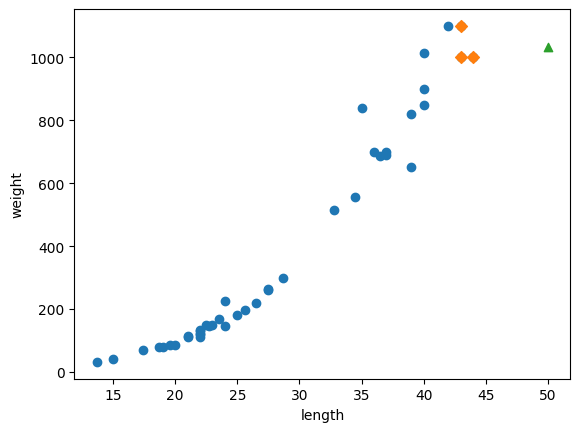

In [7]:
# 50cm 농어 그리고 이 농어의 최근접 이웃을 산점도에 표시

import matplotlib.pyplot as plt

# 50cm 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[50]])

# 훈련세트의 산점도
plt.scatter(train_input,train_target)

# 훈련 세트 중 이웃샘플
plt.scatter(train_input[indexes],train_target[indexes],marker='D')

# 50cm 농어데이터
plt.scatter(50,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 50cm 농어에서 가장 가까운 것은 45cm 근방이기 때문에
# k-최근접 이웃 알고리즘은 이 샘플들의 무게를 평균한다.

In [31]:
# 이웃 샘플의 타깃 평균
print(np.mean(train_target[indexes]))

# k-최근접 이웃 회귀는 새로운 샘플이 훈련 세트의 범위를 벗어가면
# 엉뚱한 값을 예측할 수 있다. ex) 100cm,1000cm 농어도 1033g으로 예측한다.

print(knr.predict([[100]]))
print(knr.predict([[1000]]))

1033.3333333333333
[1033.33333333]
[1033.33333333]


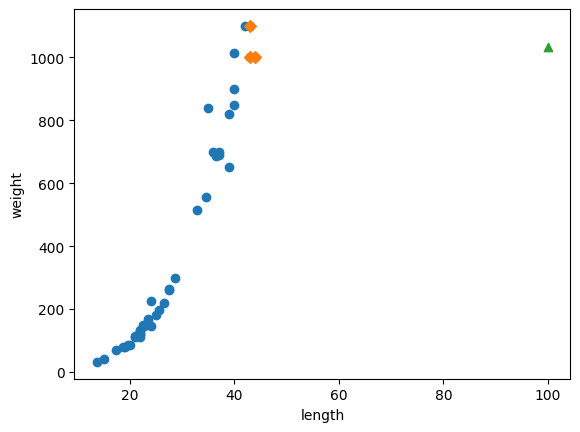

In [11]:
# 100cm 농어의 이웃을 구한다.
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도
plt.scatter(train_input,train_target)

# 훈련 세트 중 이웃 샘플
plt.scatter(train_input[indexes],train_target[indexes],marker='D')

# 100cm 농어 데이터
plt.scatter(100,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 이런 식이면 농어가 아무리 커도 무게가 늘어나지 않는다!

# 선형회귀

In [12]:
# 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input,train_target)

# 50cm 농어에 대해 예측
print(lr.predict([[50]]))

# k-최근접 이웃 회귀와 다른 값 나옴


[1241.83860323]


In [15]:
#  y = ax+b
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535477


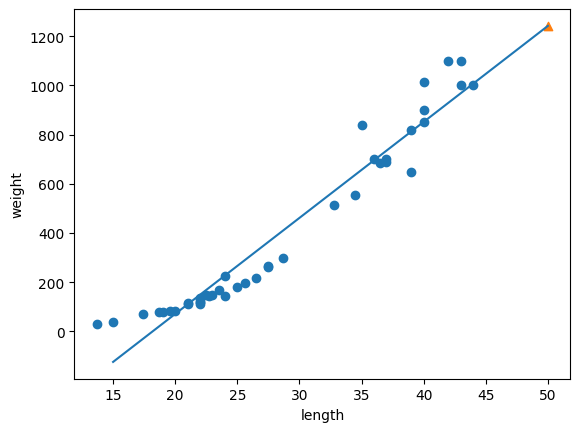

In [16]:
# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input,train_target)

# 15에서 50까지 1차 방정식 그래프를 그린다.
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50,1241.8,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [17]:
# 훈련 세트와 테스트 세트에 대한 R^2점수 확인

print(lr.score(train_input,train_target)) # 훈련세트
print(lr.score(test_input,test_target)) # 테스트 세트

0.939846333997604
0.8247503123313558


# 다항회귀

In [20]:
# 선형회귀로 할 시 농어의 무게가 0g 이하로 내려갈 수도 있는 상황이 있다?
# 최적의 직선을 찾기보단 최적의 곡선을 찾자! -> 2차 방정식 그래프 ax^2+bx+c
# column_stack함수 이용
train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2,test_input))
print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


In [32]:
# 2차 방정식 그래프를 찾기 위해 훈련 세트에 제곱 항을 추가했지만
# 타깃값은 그대로 사용!!! 목표하는 값은 어떤 그래프를 훈련하든지 바꿀 필요가 없음
lr = LinearRegression()
lr.fit(train_poly,train_target)

print(lr.predict([[60**2,60]]))

[2474.17030581]


In [25]:
# 이 모델이 훈련한 계수와 절편
print(lr.coef_,lr.intercept_)
# 무게 = 1.01*길이^2-21.6*길이+116.05

[  1.01433211 -21.55792498] 116.0502107827827


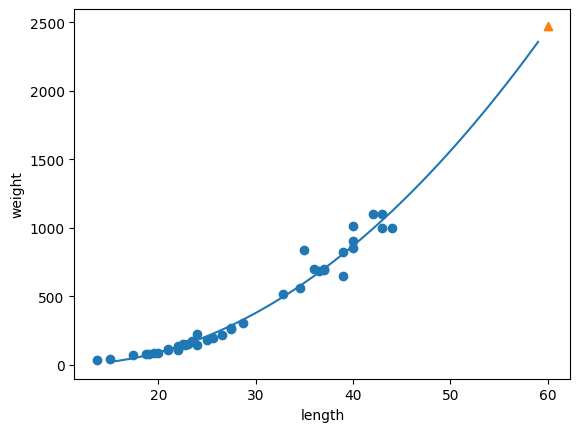

In [36]:
# 구간별 직선을 그리기 위해 15~59까지 정수 배열
point=np.arange(15,60)

# 훈련 세트의 산점도
plt.scatter(train_input,train_target)

# 15~49까지 2차 방정식 그래프
plt.plot(point,1.01*point**2-21.6*point+116.05)

# 50cm 농어 데이터
plt.scatter(60,2474,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [30]:
# R^2 점수 평가
print(lr.score(train_poly, train_target))
print(lr.score(test_poly,test_target))

# 과소적합이 아직 남아있으니,, 더 복잡한 모델이 필요할 것 같다는 판단? (책에서)
# 그건 다음장에서~

0.9706807451768623
0.9775935108325122


In [ ]:
# 결론 : k-최근접 이웃 회귀를 사용할 경우에 발생하는 가장 큰 문제는 훈련 세트 범위 밖의 샘플을 예측할 수 없다!
# 아무리 멀리 떨어져 있더라도 무조건 가장 가까운 샘플의 타깃을 평균하여 예측한다.